In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ex_01_read_data import get_welding_data
from ex_03_feature_extraction import extract_features

In [2]:
data_path = Path("data/Welding/data.csv")
plot_path = Path("plots/ex_03")
plot_path.mkdir(parents=True, exist_ok=True)

## Exercise 3.3: Feature Exploration with Pairplots

In this exercise, you will create a seaborn pairplot to visualize relationships between the features extracted from the welding data. 

In [3]:
n_samples = 1_000
data, labels, _ = get_welding_data(data_path, n_samples=n_samples)
features = extract_features(data, labels)
features.head()

current_mean  current_std  current_min  current_max  current_median  \
0    121.614776   156.669873    23.218959   516.808980       26.410372   
1    142.048507   134.311107    28.600793   435.494910       79.931875   
2    158.601351   173.400613    28.715001   523.527075       57.426872   
3    214.465956   191.293197    52.411144   549.782441       95.713758   
4    164.007091   184.685313    35.656145   538.525636       43.909325   

   current_rms  current_skew  current_kurtosis  current_range  \
0   198.332052      1.606086          1.210600     493.590020   
1   195.492332      1.137698         -0.002551     406.894117   
2   234.993960      1.189002         -0.100566     494.812074   
3   287.382556      0.841729         -1.014670     497.371297   
4   246.995933      1.157449         -0.318295     502.869491   

   current_dom_freq  ...  voltage_std  voltage_min  voltage_max  \
0               5.0  ...     5.677388    15.654858    37.410872   
1              10.0  ...     8.227634     0.292859    26.856764   
2               5.0  ...     4.214930    18.942940    31.325681   
3               5.0  ...     5.934591     5.841379    34.143001   
4               5.0  ...     5.349670     6.538565    31.608197   

   voltage_median  voltage_rms  voltage_skew  voltage_kurtosis  voltage_range  \
0       18.097733    22.409581      1.208769          0.071522      21.756014   
1       14.272633    13.173972      0.139144         -1.362445      26.563905   
2       20.745001    23.235220      0.890109         -0.643407      12.382741   
3       22.941975    24.499368     -0.701606          1.104949      28.301623   
4       19.253936    22.763799      0.473906         -0.453440      25.069632   

   voltage_dom_freq  label  
0              10.0      1  
1              10.0      0  
2               5.0      0  
3              10.0      0  
4               5.0      0  

[5 rows x 21 columns]

Pairplot saved to: plots/ex_03/feature_pairplot.png


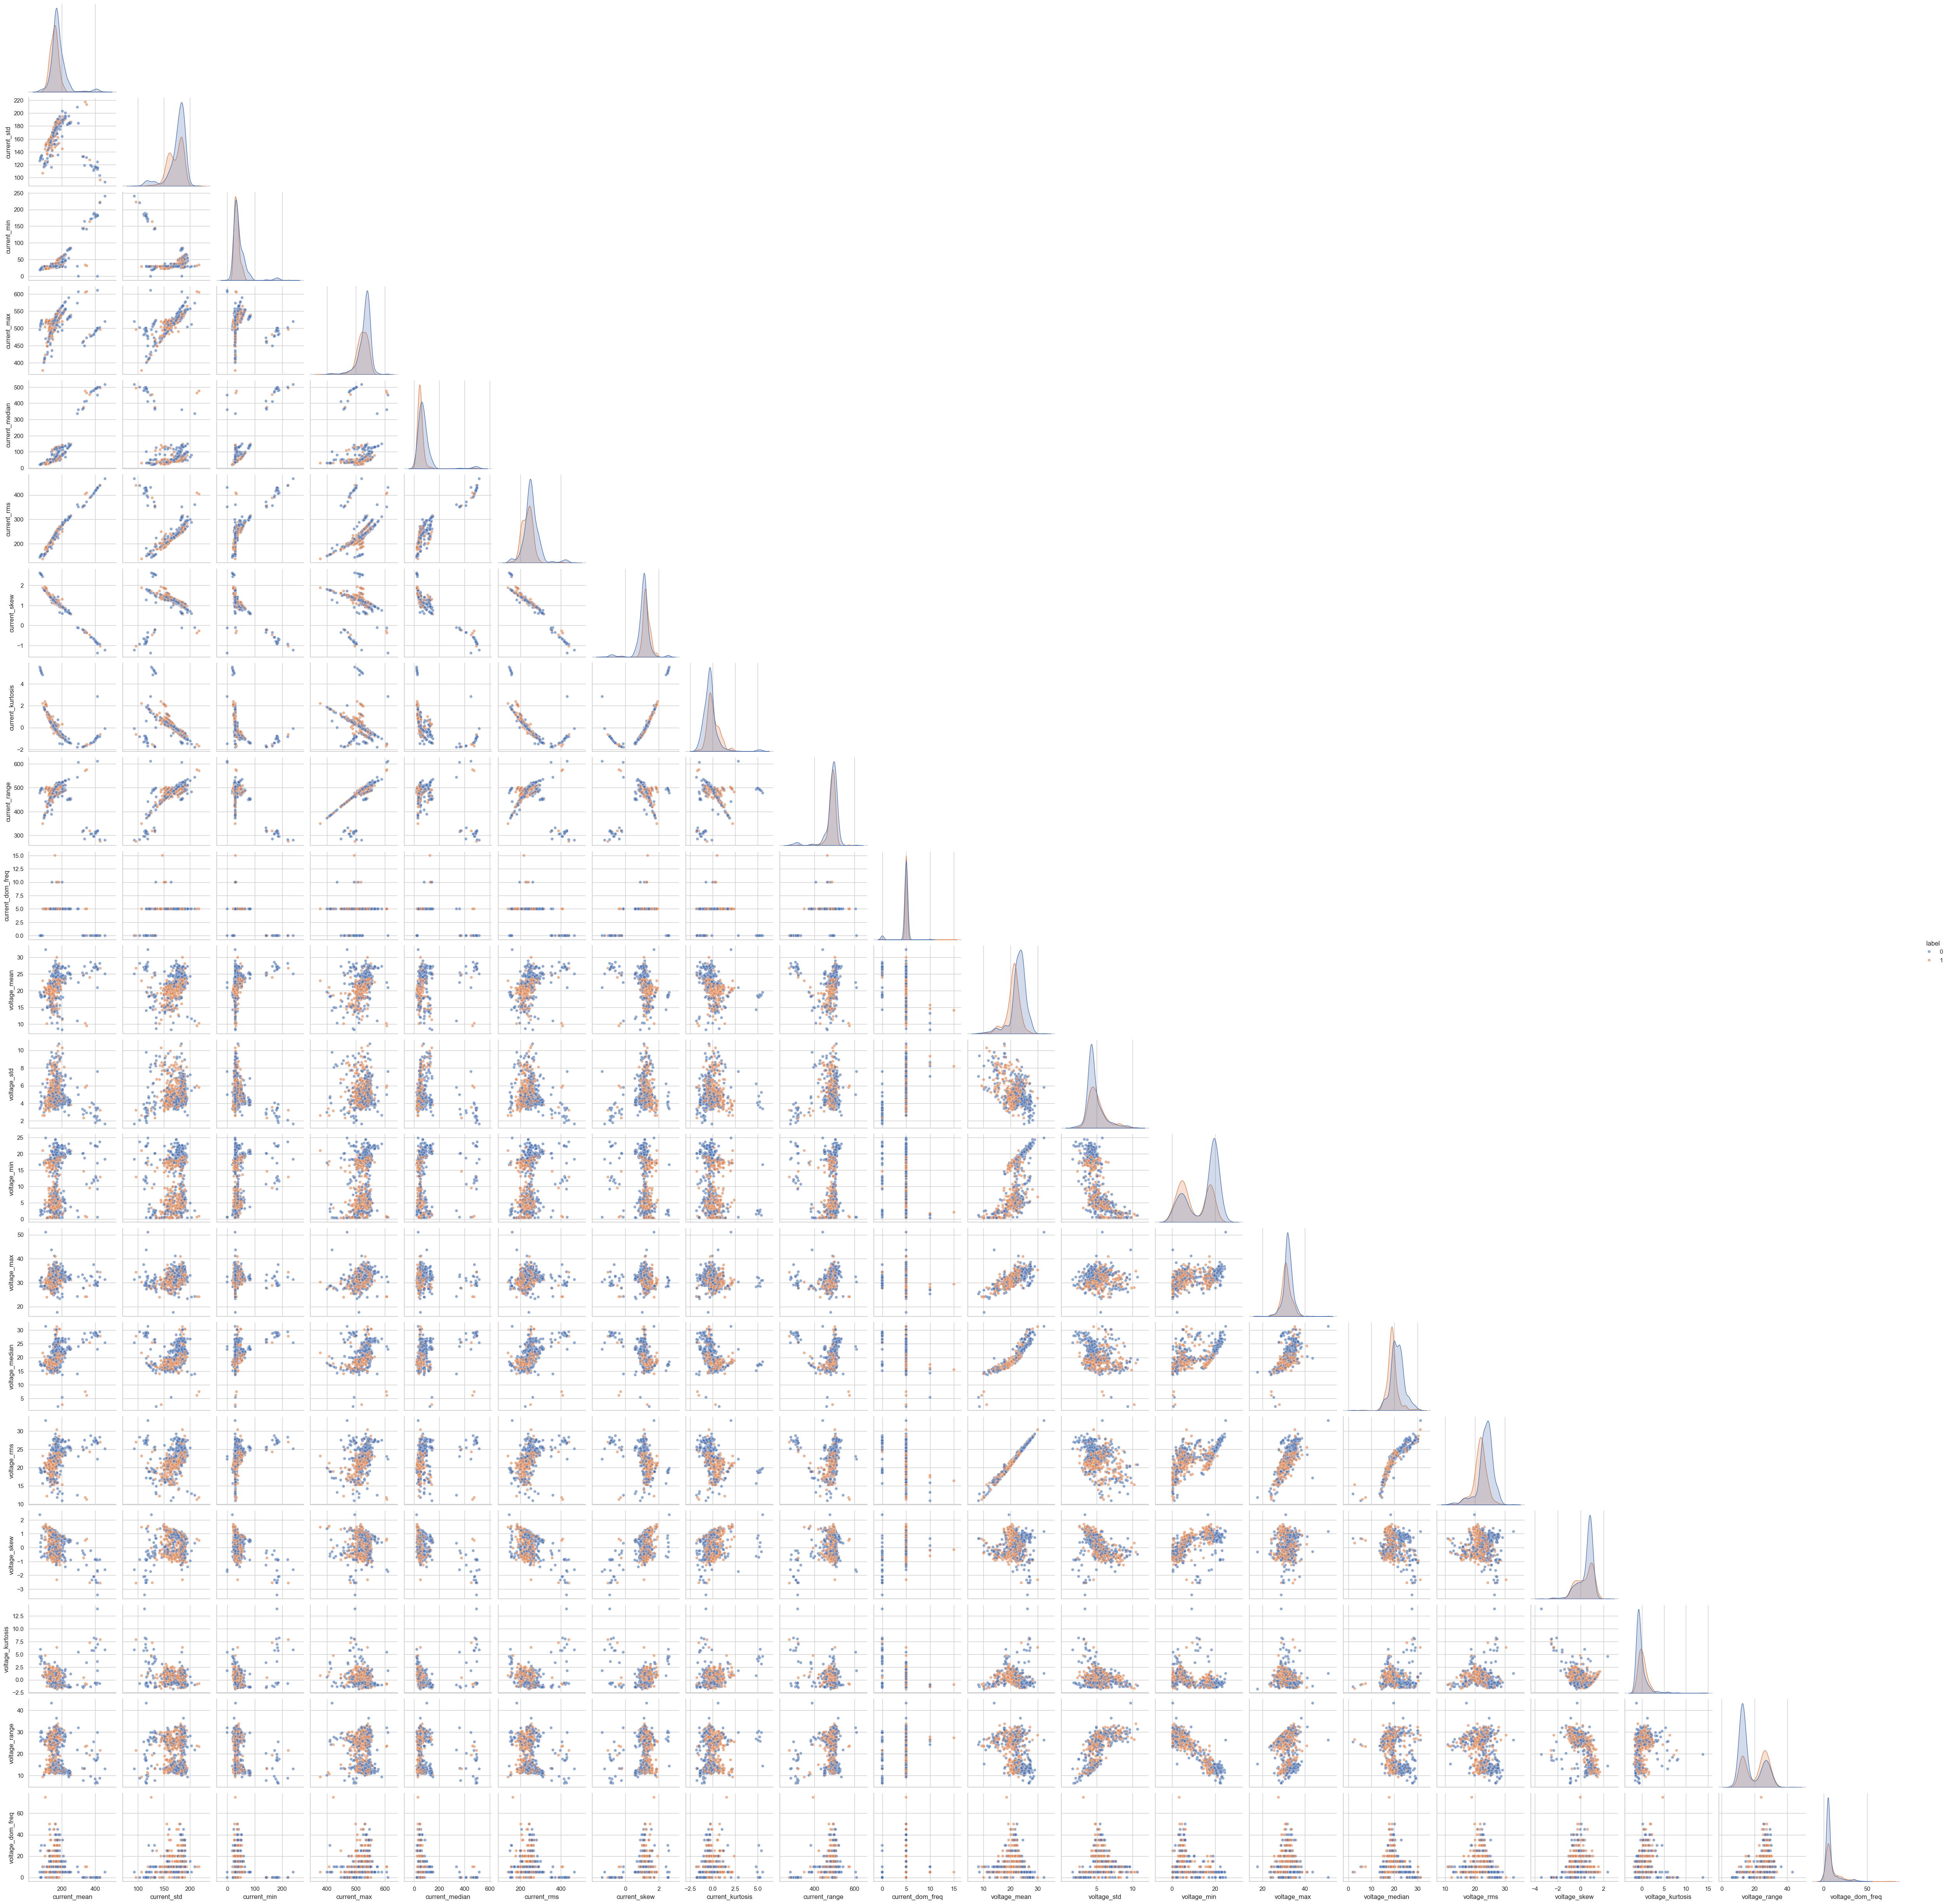

In [15]:
# Create the pairplot
sns.set_theme(style="whitegrid", context="notebook")
pairplot = sns.pairplot(
    features,
    hue="label",
    corner=True,
    plot_kws={"alpha": 0.6, "s": 30}
)

# Save the pairplot
pairplot.savefig(plot_path / "feature_pairplot.png", dpi=300)
print("Pairplot saved to:", plot_path / "feature_pairplot.png")

## Exercise 3.4: Describe Your Feature Selection

Based on the pairplot visualization from Exercise 3.1, provide a detailed analysis of your feature selection:

1. Which features appear most effective at separating the quality classes?
2. Are there features that show strong correlation with each other? Would it make sense to remove any redundant features?
3. Explain the physical significance of your selected features in the context of welding quality.
4. If you were to select a subset of 5 most important features for classifying welding quality, which would you choose and why?
5. Discuss any patterns or insights you discovered in the data visualization that might help with building a classification model.


In [ ]:
"""
1. The most effective features for separating quality classes are current_dom_freq, voltage_dom_freq, voltage_mean and current_std. They reflect physical differences in arc stability, energy delivery, and electrical noise across welding quality levels.

2. current_mean and voltage_mean often move together, indicating consistent energy input. current_std and voltage_std also mirror each other, suggesting common sources of variability. Although correlated, they each capture a different signal domain (current vs voltage), so removal depends on model performance and feature importance.

3. current_mean and voltage_mean represent average power input, crucial for consistent weld penetration. current_std and voltage_std reflect arc stability, higher variability often indicates defects.

4. voltage_dom_freq, current_dom_freq, voltage_mean, current_std and voltage_std cover distinct yet complementary dimensions: central tendency, variation and spectral behavior.

5. Certain class pairs form tight clusters in specific feature spaces, hinting at strong predictive potential.
Some classes overlap slightly, which may require non-linear classifiers or interaction terms.
"""